In [1]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.

import pywt
import numpy as np
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import stock price data as a csv file. 
#I used all the indicators described in the paper, and found that different combinations work for different financial markets.


df1=pd.read_csv('/home/parth/Documents/300122.csv', header= None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,日期,开盘价,最高价,最低价,收盘价,成交量,MACD指数平滑移动平均\n[MACD指标选项]MACD\n[周期数]9\n[短期周期数]1...,CCI顺势指标\n[周期数]14,ATR真实波幅\n[ATR指标选项]TR\n[周期数]14,BOLL布林带\n[BOLL指标选项]MID\n[周期数]26\n[带宽]2,MA简单移动平均\n[周期数]5,MA简单移动平均\n[周期数]10,MTM动力指标\n[MTM指标选项]MTM\n[周期数]6\n[间隔周期数]6,MTM动力指标\n[MTM指标选项]MTM\n[周期数]12\n[间隔周期数]12,ROC变动速率\n[ROC指标选项]ROC\n[周期数]6\n[间隔周期数]12,WVAD威廉变异离散量\n[WVAD指标选项]WVAD\n[周期数1]24\n[周期数2]6,BETA值(最近24个月),换手率
1,Date,open,high,low,close,volume,MACD,CCI,ATR,BOLL,MA,MA,MTM,MTM,ROC,WVAD,beta_24m,turn
2,2015-01-26,21.6600,22.0800,21.6600,21.9300,3560620.0000,0.8052,112.5533,0.4200,20.4650,21.8040,21.1270,1.4400,1.7800,8.8337,128986.1770,-0.3577,1.1077
3,2015-01-27,21.9300,22.8800,21.8500,22.7800,8197538.0000,0.8585,139.0544,1.0300,20.5381,22.0940,21.3580,2.1100,2.3900,11.7214,244307.3277,-0.3577,2.5502
4,2015-01-28,22.6300,23.9700,22.3800,23.1400,9751775.0000,0.9009,154.5716,1.5900,20.6508,22.4200,21.6520,1.8100,2.5100,12.1667,244301.1477,-0.3577,3.0337
5,2015-01-29,23.0600,23.8800,22.8200,23.5000,6901824.0000,0.9323,141.3096,1.0600,20.8373,22.6320,21.9600,1.9900,3.0300,14.8021,250764.2583,-0.3577,2.1471
6,2015-01-30,23.4900,23.7300,22.4200,22.5000,5191948.0000,0.7794,88.8265,1.3100,20.9692,22.7700,22.1610,0.0600,2.3000,11.3861,225925.4734,-0.4293,1.6152
7,2015-02-02,22.5800,22.9300,22.2900,22.3300,3845721.0000,0.6231,54.6187,0.6400,21.0646,22.8500,22.3270,0.5200,1.9100,9.3536,150313.1786,-0.4293,1.1964
8,2015-02-03,22.7300,22.9700,22.4500,22.8000,3859499.0000,0.5533,63.8468,0.6400,21.1842,22.8540,22.4740,0.8700,2.3100,11.2738,182548.3810,-0.4293,1.2006
9,2015-02-04,22.8100,22.9600,22.3300,22.3800,3276552.0000,0.4264,41.2245,0.6300,21.2377,22.7020,22.5610,-0.4000,1.7100,8.2729,179279.2534,-0.4293,1.0193


In [3]:
#A couple of transformations to neatly label the data, and clearly index it. Notice how I index not using datetime but using conventional numbering.

df1=df1.drop([0])
df1= pd.DataFrame(df1.values, columns=['date','open','high','low','close','volume',' MACD', 'CCI', 'ATR','BOLL', 'MA5','MA10','MTM6','MTM12', 'ROC','WVAD','beta_24m','turn'])
df1=df1.drop([0])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,Date,open,high,low,close,volume,MACD,CCI,ATR,BOLL,MA,MA,MTM,MTM,ROC,WVAD,beta_24m,turn
2,2015-01-26,21.6600,22.0800,21.6600,21.9300,3560620.0000,0.8052,112.5533,0.4200,20.4650,21.8040,21.1270,1.4400,1.7800,8.8337,128986.1770,-0.3577,1.1077
3,2015-01-27,21.9300,22.8800,21.8500,22.7800,8197538.0000,0.8585,139.0544,1.0300,20.5381,22.0940,21.3580,2.1100,2.3900,11.7214,244307.3277,-0.3577,2.5502
4,2015-01-28,22.6300,23.9700,22.3800,23.1400,9751775.0000,0.9009,154.5716,1.5900,20.6508,22.4200,21.6520,1.8100,2.5100,12.1667,244301.1477,-0.3577,3.0337
5,2015-01-29,23.0600,23.8800,22.8200,23.5000,6901824.0000,0.9323,141.3096,1.0600,20.8373,22.6320,21.9600,1.9900,3.0300,14.8021,250764.2583,-0.3577,2.1471
6,2015-01-30,23.4900,23.7300,22.4200,22.5000,5191948.0000,0.7794,88.8265,1.3100,20.9692,22.7700,22.1610,0.0600,2.3000,11.3861,225925.4734,-0.4293,1.6152
7,2015-02-02,22.5800,22.9300,22.2900,22.3300,3845721.0000,0.6231,54.6187,0.6400,21.0646,22.8500,22.3270,0.5200,1.9100,9.3536,150313.1786,-0.4293,1.1964
8,2015-02-03,22.7300,22.9700,22.4500,22.8000,3859499.0000,0.5533,63.8468,0.6400,21.1842,22.8540,22.4740,0.8700,2.3100,11.2738,182548.3810,-0.4293,1.2006
9,2015-02-04,22.8100,22.9600,22.3300,22.3800,3276552.0000,0.4264,41.2245,0.6300,21.2377,22.7020,22.5610,-0.4000,1.7100,8.2729,179279.2534,-0.4293,1.0193
10,2015-02-05,22.7800,22.7800,22.1600,22.2300,2995749.0000,0.3038,15.9248,0.6200,21.3088,22.4480,22.5400,-0.9100,0.9000,4.2194,155874.0893,-0.4293,0.9319


In [7]:
df1

,date,open,high,low,close,volume,MACD,CCI,ATR,BOLL,MA5,MA10,MTM6,MTM12,ROC,WVAD,beta_24m,turn
1,2015-01-26,21.6600,22.0800,21.6600,21.9300,3560620.0000,0.8052,112.5533,0.4200,20.4650,21.8040,21.1270,1.4400,1.7800,8.8337,128986.1770,-0.3577,1.1077
2,2015-01-27,21.9300,22.8800,21.8500,22.7800,8197538.0000,0.8585,139.0544,1.0300,20.5381,22.0940,21.3580,2.1100,2.3900,11.7214,244307.3277,-0.3577,2.5502
3,2015-01-28,22.6300,23.9700,22.3800,23.1400,9751775.0000,0.9009,154.5716,1.5900,20.6508,22.4200,21.6520,1.8100,2.5100,12.1667,244301.1477,-0.3577,3.0337
4,2015-01-29,23.0600,23.8800,22.8200,23.5000,6901824.0000,0.9323,141.3096,1.0600,20.8373,22.6320,21.9600,1.9900,3.0300,14.8021,250764.2583,-0.3577,2.1471
5,2015-01-30,23.4900,23.7300,22.4200,22.5000,5191948.0000,0.7794,88.8265,1.3100,20.9692,22.7700,22.1610,0.0600,2.3000,11.3861,225925.4734,-0.4293,1.6152
6,2015-02-02,22.5800,22.9300,22.2900,22.3300,3845721.0000,0.6231,54.6187,0.6400,21.0646,22.8500,22.3270,0.5200,1.9100,9.3536,150313.1786,-0.4293,1.1964
7,2015-02-03,22.7300,22.9700,22.4500,22.8000,3859499.0000,0.5533,63.8468,0.6400,21.1842,22.8540,22.4740,0.8700,2.3100,11.2738,182548.3810,-0.4293,1.2006
8,2015-02-04,22.8100,22.9600,22.3300,22.3800,3276552.0000,0.4264,41.2245,0.6300,21.2377,22.7020,22.5610,-0.4000,1.7100,8.2729,179279.2534,-0.4293,1.0193
9,2015-02-05,22.7800,22.7800,22.1600,22.2300,2995749.0000,0.3038,15.9248,0.6200,21.3088,22.4480,22.5400,-0.9100,0.9000,4.2194,155874.0893,-0.4293,0.9319
10,2015-02-06,22.2400,22.4700,21.0600,21.2400,3969315.0000,0.0825,-91.0054,1.4100,21.3681,22.1960,22.4830,-2.2600,-0.2700,-1.2552,138152.9705,-0.4293,1.2348


In [8]:
df1.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', ' MACD', 'CCI', 'ATR',
       'BOLL', 'MA5', 'MA10', 'MTM6', 'MTM12', 'ROC', 'WVAD', 'beta_24m',
       'turn'],
      dtype='object')

In [11]:
#The data for some reason was an object type, which is why I apply this transform.No transforms applied to the date.
df1[['open','high','low','close','volume',' MACD', 'CCI', 'ATR','BOLL', 'MA5','MA10','MTM6','MTM12', 'ROC','WVAD','beta_24m','turn']]=df1[['open','high','low','close','volume',' MACD', 'CCI', 'ATR','BOLL', 'MA5','MA10','MTM6','MTM12', 'ROC','WVAD','beta_24m','turn']].apply(pd.to_numeric, errors='ignore')

In [12]:
df1.dtypes

date         object
open        float64
high        float64
low         float64
close       float64
volume      float64
 MACD       float64
CCI         float64
ATR         float64
BOLL        float64
MA5         float64
MA10        float64
MTM6        float64
MTM12       float64
ROC         float64
WVAD        float64
beta_24m    float64
turn        float64
dtype: object

In [14]:
#Now I want to apply the wavelet transform on the OHLCV data , for which I create a new dataframe.
#Bear with me through the steps, it was a stepwise implementation of everything described in the paper,
#and I wanted to make sure I was doing everything that they said.

df3= df1[['open','high','low','close','volume']]
df3

,open,high,low,close,volume
0,21.66,22.08,21.66,21.93,3560620.0
1,21.93,22.88,21.85,22.78,8197538.0
2,22.63,23.97,22.38,23.14,9751775.0
3,23.06,23.88,22.82,23.50,6901824.0
4,23.49,23.73,22.42,22.50,5191948.0
5,22.58,22.93,22.29,22.33,3845721.0
6,22.73,22.97,22.45,22.80,3859499.0
7,22.81,22.96,22.33,22.38,3276552.0
8,22.78,22.78,22.16,22.23,2995749.0
9,22.24,22.47,21.06,21.24,3969315.0


In [15]:
df3.isnull().values.any()

False

In [16]:
#Since I was going to be using close values for the stock, I created a series of close prices from DF3.
#PyWt works on series values too, so this was a necessary step.
a=df3.close.values
a

array([21.93, 22.78, 23.14, 23.5 , 22.5 , 22.33, 22.8 , 22.38, 22.23,
       21.24, 20.9 , 21.2 , 21.5 , 21.53, 22.22, 22.53, 22.47, 22.51,
       22.09, 22.39, 23.96, 25.  , 25.25, 25.55, 24.5 , 24.82, 25.66,
       25.48, 24.62, 24.81, 27.2 , 27.24, 28.01, 28.  , 28.17, 28.36,
       28.02, 28.8 , 29.01, 29.35, 29.29, 30.36, 33.4 , 34.1 , 34.38,
       34.48, 32.  , 31.52, 32.79, 32.49, 31.18, 28.7 , 28.84, 29.24,
       29.21, 30.28, 30.53, 31.3 , 29.93, 29.7 , 28.59, 29.79, 29.52,
       29.75, 28.99, 28.58, 27.62, 28.59, 29.88, 30.26, 31.38, 31.82,
       30.82, 32.45, 32.86, 33.47, 33.89, 33.18, 34.18, 37.6 , 41.36,
       37.13, 39.  , 41.21, 44.24, 45.71, 45.61, 44.  , 43.85, 41.43,
       42.  , 44.08, 42.9 , 40.81, 40.3 , 41.73, 39.15, 35.24, 36.2 ,
       36.38, 34.  , 30.6 , 27.54, 28.85, 26.98, 24.36, 22.01, 19.81,
       19.8 , 19.8 , 19.8 , 19.8 , 19.8 , 21.78, 23.25, 24.7 , 26.6 ,
       26.82, 26.21, 26.64, 28.29, 28.25, 25.43, 24.97, 26.66, 25.61,
       25.47, 23.05,

In [17]:
a.shape

(913,)

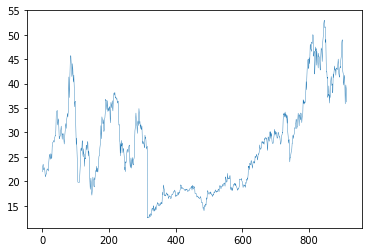

In [18]:
#Made a plot to visually see how the data was recreated. I saved it in the .svg format to 
#save the image in lossless format.
plt.plot(a,linewidth=0.4)
plt.savefig('/home/parth/Pictures/work/300122/noisy.svg')
plt.show()

In [19]:
#Now that I have the original close price series isolated and plotted,I begin the transform process.
#I create a matrix of the OHLCV values and I begin.
b=df3.values


In [20]:
b.shape

(913, 5)

In [21]:
coeffs= pywt.wavedec2(b, 'haar', mode='symmetric',level=2 )

In [22]:
coeffs[-2] = tuple([np.zeros_like(v) for v in coeffs[-2]])

In [23]:
c=pywt.waverec2(coeffs,'haar')

In [24]:
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)

In [25]:
coeffs1[-2] = tuple([np.zeros_like(v) for v in coeffs1[-2]])

In [26]:
d=pywt.waverec2(coeffs1, 'haar')

In [27]:
df2=pd.DataFrame({'open':d[:,0],'high':d[:,1],'low':d[:,2],'close':d[:,3],'volume':d[:,4]})

In [28]:
e=df2.close.values

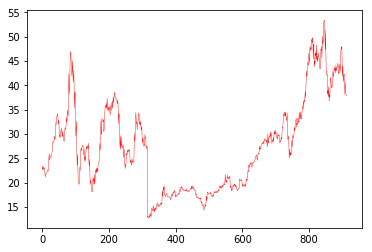

In [29]:
#That's the whole stepwise process of using wavelet transform.
#Every step is a separate cell to make sure I'm not messing anything up.
#The new series itself is not much different from the original series, a few differences.

plt.plot(e, linewidth=0.4, color='r')
plt.savefig('/home/parth/Pictures/work/300122/reconstructed.svg')

In [30]:
e

array([22.509375, 23.359375, 22.814375, 23.174375, 22.84625 , 22.67625 ,
       23.04125 , 22.62125 , 22.161875, 21.171875, 21.554375, 21.854375,
       21.950625, 21.980625, 21.913125, 22.223125, 22.496875, 22.536875,
       22.356875, 22.656875, 24.91    , 25.95    , 24.6525  , 24.9525  ,
       25.134375, 25.454375, 25.491875, 25.311875, 25.795   , 25.985   ,
       26.44    , 26.48    , 28.410625, 28.400625, 28.233125, 28.423125,
       28.790625, 29.570625, 28.890625, 29.230625, 31.275625, 32.345625,
       31.908125, 32.608125, 33.65875 , 33.75875 , 34.21125 , 33.73125 ,
       32.425   , 32.125   , 32.845   , 30.365   , 29.395   , 29.795   ,
       29.255   , 30.325   , 30.4075  , 31.1775  , 30.685   , 30.455   ,
       29.351875, 30.551875, 29.536875, 29.766875, 28.978125, 28.568125,
       28.488125, 29.458125, 30.85875 , 31.23875 , 30.86875 , 31.30875 ,
       31.9125  , 33.5425  , 32.455   , 33.065   , 34.948125, 34.238125,
       33.720625, 37.140625, 42.39125 , 38.16125 , 

In [32]:
df2

,open,high,low,close,volume
0,22.156875,22.576875,22.239375,22.509375,4784480.25
1,22.426875,23.376875,22.429375,23.359375,9421398.25
2,21.879375,23.219375,22.054375,22.814375,8527914.75
3,22.309375,23.129375,22.494375,23.174375,5677963.75
4,23.038750,23.278750,22.766250,22.846250,4716543.50
5,22.128750,22.478750,22.636250,22.676250,3370316.50
6,22.593750,22.833750,22.691250,23.041250,4334903.50
7,22.673750,22.823750,22.571250,22.621250,3751956.50
8,21.816875,21.816875,22.091875,22.161875,2172150.50
9,21.276875,21.506875,20.991875,21.171875,3145716.50


In [33]:
df2=df2.drop(df2.index[913])

In [34]:
df1[['open','high','low','close','volume']]=df2[['open','high','low','close','volume']]

In [35]:
#If the above steps were confusing, I replaced the original OHLCV data with the transformed data as described in the paper.
#df1 is now the dataframe with replaced values
df1

,date,open,high,low,close,volume,MACD,CCI,ATR,BOLL,MA5,MA10,MTM6,MTM12,ROC,WVAD,beta_24m,turn
0,2015-01-26,22.156875,22.576875,22.239375,22.509375,4784480.25,0.8052,112.5533,0.42,20.4650,21.804,21.127,1.44,1.78,8.8337,128986.1770,-0.3577,1.1077
1,2015-01-27,22.426875,23.376875,22.429375,23.359375,9421398.25,0.8585,139.0544,1.03,20.5381,22.094,21.358,2.11,2.39,11.7214,244307.3277,-0.3577,2.5502
2,2015-01-28,21.879375,23.219375,22.054375,22.814375,8527914.75,0.9009,154.5716,1.59,20.6508,22.420,21.652,1.81,2.51,12.1667,244301.1477,-0.3577,3.0337
3,2015-01-29,22.309375,23.129375,22.494375,23.174375,5677963.75,0.9323,141.3096,1.06,20.8373,22.632,21.960,1.99,3.03,14.8021,250764.2583,-0.3577,2.1471
4,2015-01-30,23.038750,23.278750,22.766250,22.846250,4716543.50,0.7794,88.8265,1.31,20.9692,22.770,22.161,0.06,2.30,11.3861,225925.4734,-0.4293,1.6152
5,2015-02-02,22.128750,22.478750,22.636250,22.676250,3370316.50,0.6231,54.6187,0.64,21.0646,22.850,22.327,0.52,1.91,9.3536,150313.1786,-0.4293,1.1964
6,2015-02-03,22.593750,22.833750,22.691250,23.041250,4334903.50,0.5533,63.8468,0.64,21.1842,22.854,22.474,0.87,2.31,11.2738,182548.3810,-0.4293,1.2006
7,2015-02-04,22.673750,22.823750,22.571250,22.621250,3751956.50,0.4264,41.2245,0.63,21.2377,22.702,22.561,-0.40,1.71,8.2729,179279.2534,-0.4293,1.0193
8,2015-02-05,21.816875,21.816875,22.091875,22.161875,2172150.50,0.3038,15.9248,0.62,21.3088,22.448,22.540,-0.91,0.90,4.2194,155874.0893,-0.4293,0.9319
9,2015-02-06,21.276875,21.506875,20.991875,21.171875,3145716.50,0.0825,-91.0054,1.41,21.3681,22.196,22.483,-2.26,-0.27,-1.2552,138152.9705,-0.4293,1.2348


In [36]:
df1.isnull().values.any()

True

In [39]:
#Replacing null values by interpolation
df1=df1.interpolate(method='akima')

In [40]:
df1.isnull().values.any()

False

In [41]:
from sklearn import preprocessing
data=df1.drop(['date'],axis=1)

In [42]:
#Scaling data to make sure gradient descent finds optimum minimum loss.
scaler= preprocessing.MinMaxScaler()
scaled_df1=scaler.fit_transform(data)

In [43]:
scaled_df1=pd.DataFrame(scaled_df1)

In [44]:
scaled_df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.252949,0.243349,0.250827,0.240672,0.137058,0.757827,0.735307,0.028359,0.202262,0.232116,0.219389,0.676183,0.670628,0.607921,0.466725,0.026215,0.131693
1,0.259663,0.262774,0.255591,0.261563,0.213155,0.765858,0.768949,0.069548,0.204434,0.239431,0.225487,0.701352,0.687889,0.634396,0.578784,0.026215,0.303191
2,0.246049,0.258950,0.246188,0.248168,0.198492,0.772246,0.788648,0.107360,0.207784,0.247654,0.233249,0.690083,0.691285,0.638479,0.578778,0.026215,0.360674
3,0.256741,0.256764,0.257221,0.257016,0.151721,0.776978,0.771812,0.071573,0.213326,0.253002,0.241380,0.696844,0.705999,0.662641,0.585058,0.026215,0.255267
4,0.274878,0.260391,0.264039,0.248952,0.135943,0.753940,0.705186,0.088454,0.217246,0.256483,0.246687,0.624343,0.685342,0.631322,0.560922,0.000000,0.192030
5,0.252250,0.240967,0.260779,0.244774,0.113850,0.730390,0.661760,0.043214,0.220081,0.258501,0.251069,0.641623,0.674307,0.612687,0.487448,0.000000,0.142239
6,0.263812,0.249586,0.262158,0.253744,0.129680,0.719873,0.673475,0.043214,0.223635,0.258602,0.254950,0.654771,0.685625,0.630292,0.518772,0.000000,0.142738
7,0.265802,0.249344,0.259149,0.243422,0.120113,0.700753,0.644756,0.042539,0.225225,0.254767,0.257247,0.607062,0.668647,0.602779,0.515595,0.000000,0.121184
8,0.244495,0.224896,0.247128,0.232132,0.094186,0.682281,0.612639,0.041864,0.227338,0.248360,0.256693,0.587904,0.645727,0.565615,0.492852,0.000000,0.110793
9,0.231067,0.217370,0.219544,0.207800,0.110164,0.648938,0.476894,0.095206,0.229100,0.242004,0.255188,0.537190,0.612620,0.515422,0.475632,0.000000,0.146804


In [45]:
price=scaled_df1[3]
price

0      0.240672
1      0.261563
2      0.248168
3      0.257016
4      0.248952
5      0.244774
6      0.253744
7      0.243422
8      0.232132
9      0.207800
10     0.217201
11     0.224574
12     0.226940
13     0.227677
14     0.226018
15     0.233637
16     0.240365
17     0.241348
18     0.236924
19     0.244297
20     0.299673
21     0.325233
22     0.293344
23     0.300717
24     0.305187
25     0.313052
26     0.313974
27     0.309550
28     0.321424
29     0.326093
         ...   
883    0.745457
884    0.763721
885    0.763721
886    0.760833
887    0.782953
888    0.771586
889    0.727347
890    0.739881
891    0.734474
892    0.767730
893    0.777561
894    0.740449
895    0.780756
896    0.842076
897    0.862229
898    0.855471
899    0.866530
900    0.756332
901    0.716763
902    0.768191
903    0.711663
904    0.688807
905    0.722969
906    0.726963
907    0.690588
908    0.626780
909    0.687240
910    0.645643
911    0.627456
912    0.618070
Name: 3, Length: 913, dt

In [70]:
#This is a test to see how correlated serial values are to each other.
from pandas.tools.plotting import lag_plot
from pandas import concat
values=pd.DataFrame(price.values)
dataframe=concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
reesult=dataframe.corr()
print(reesult)

          t-1       t+1
t-1  1.000000  0.991007
t+1  0.991007  1.000000


/home/parth/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


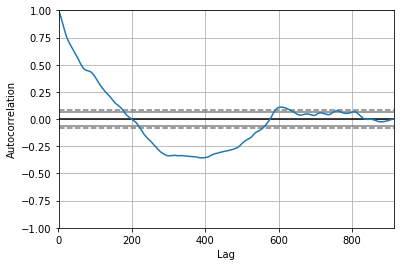

In [72]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(price)
plt.show()

In [46]:
df4=scaled_df1.drop([3],axis=1)

In [47]:
df4.shape

(913, 16)

In [75]:
#At this point the data is transformed and without written labels, which is confusing, but that's ok.
df4

,0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.252949,0.243349,0.250827,0.137058,0.757827,0.735307,0.028359,0.202262,0.232116,0.219389,0.676183,0.670628,0.607921,0.466725,0.026215,0.131693
1,0.259663,0.262774,0.255591,0.213155,0.765858,0.768949,0.069548,0.204434,0.239431,0.225487,0.701352,0.687889,0.634396,0.578784,0.026215,0.303191
2,0.246049,0.258950,0.246188,0.198492,0.772246,0.788648,0.107360,0.207784,0.247654,0.233249,0.690083,0.691285,0.638479,0.578778,0.026215,0.360674
3,0.256741,0.256764,0.257221,0.151721,0.776978,0.771812,0.071573,0.213326,0.253002,0.241380,0.696844,0.705999,0.662641,0.585058,0.026215,0.255267
4,0.274878,0.260391,0.264039,0.135943,0.753940,0.705186,0.088454,0.217246,0.256483,0.246687,0.624343,0.685342,0.631322,0.560922,0.000000,0.192030
5,0.252250,0.240967,0.260779,0.113850,0.730390,0.661760,0.043214,0.220081,0.258501,0.251069,0.641623,0.674307,0.612687,0.487448,0.000000,0.142239
6,0.263812,0.249586,0.262158,0.129680,0.719873,0.673475,0.043214,0.223635,0.258602,0.254950,0.654771,0.685625,0.630292,0.518772,0.000000,0.142738
7,0.265802,0.249344,0.259149,0.120113,0.700753,0.644756,0.042539,0.225225,0.254767,0.257247,0.607062,0.668647,0.602779,0.515595,0.000000,0.121184
8,0.244495,0.224896,0.247128,0.094186,0.682281,0.612639,0.041864,0.227338,0.248360,0.256693,0.587904,0.645727,0.565615,0.492852,0.000000,0.110793
9,0.231067,0.217370,0.219544,0.110164,0.648938,0.476894,0.095206,0.229100,0.242004,0.255188,0.537190,0.612620,0.515422,0.475632,0.000000,0.146804


In [48]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [49]:
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [52]:
df4=scaled_df1.drop([3],axis=1)

In [53]:
df4

,0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.252949,0.243349,0.250827,0.137058,0.757827,0.735307,0.028359,0.202262,0.232116,0.219389,0.676183,0.670628,0.607921,0.466725,0.026215,0.131693
1,0.259663,0.262774,0.255591,0.213155,0.765858,0.768949,0.069548,0.204434,0.239431,0.225487,0.701352,0.687889,0.634396,0.578784,0.026215,0.303191
2,0.246049,0.258950,0.246188,0.198492,0.772246,0.788648,0.107360,0.207784,0.247654,0.233249,0.690083,0.691285,0.638479,0.578778,0.026215,0.360674
3,0.256741,0.256764,0.257221,0.151721,0.776978,0.771812,0.071573,0.213326,0.253002,0.241380,0.696844,0.705999,0.662641,0.585058,0.026215,0.255267
4,0.274878,0.260391,0.264039,0.135943,0.753940,0.705186,0.088454,0.217246,0.256483,0.246687,0.624343,0.685342,0.631322,0.560922,0.000000,0.192030
5,0.252250,0.240967,0.260779,0.113850,0.730390,0.661760,0.043214,0.220081,0.258501,0.251069,0.641623,0.674307,0.612687,0.487448,0.000000,0.142239
6,0.263812,0.249586,0.262158,0.129680,0.719873,0.673475,0.043214,0.223635,0.258602,0.254950,0.654771,0.685625,0.630292,0.518772,0.000000,0.142738
7,0.265802,0.249344,0.259149,0.120113,0.700753,0.644756,0.042539,0.225225,0.254767,0.257247,0.607062,0.668647,0.602779,0.515595,0.000000,0.121184
8,0.244495,0.224896,0.247128,0.094186,0.682281,0.612639,0.041864,0.227338,0.248360,0.256693,0.587904,0.645727,0.565615,0.492852,0.000000,0.110793
9,0.231067,0.217370,0.219544,0.110164,0.648938,0.476894,0.095206,0.229100,0.242004,0.255188,0.537190,0.612620,0.515422,0.475632,0.000000,0.146804


In [54]:
price=pd.Series(price)
price

0      0.240672
1      0.261563
2      0.248168
3      0.257016
4      0.248952
5      0.244774
6      0.253744
7      0.243422
8      0.232132
9      0.207800
10     0.217201
11     0.224574
12     0.226940
13     0.227677
14     0.226018
15     0.233637
16     0.240365
17     0.241348
18     0.236924
19     0.244297
20     0.299673
21     0.325233
22     0.293344
23     0.300717
24     0.305187
25     0.313052
26     0.313974
27     0.309550
28     0.321424
29     0.326093
         ...   
883    0.745457
884    0.763721
885    0.763721
886    0.760833
887    0.782953
888    0.771586
889    0.727347
890    0.739881
891    0.734474
892    0.767730
893    0.777561
894    0.740449
895    0.780756
896    0.842076
897    0.862229
898    0.855471
899    0.866530
900    0.756332
901    0.716763
902    0.768191
903    0.711663
904    0.688807
905    0.722969
906    0.726963
907    0.690588
908    0.626780
909    0.687240
910    0.645643
911    0.627456
912    0.618070
Name: 3, Length: 913, dt

In [55]:
g=df4.values

In [56]:
g.shape

(913, 16)

In [57]:
#Splitting training/testing data
exp_X_train=g[:760,:]
exp_X_test=g[760:,:]
print(exp_X_train.shape,exp_X_test.shape)

(760, 16) (153, 16)


In [58]:
h=price.values

In [59]:
exp_y_train=h[:760]
exp_y_test=h[760:]
print(exp_y_train.shape, exp_y_test.shape)

(760,) (153,)


In [60]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(760, 1, 16) (153, 1, 16) (760,) (153,)


In [61]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [62]:
#Creating the neural network architecture described in the paper
neurons=60
dropout=0.20
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='sigmoid'))
model1.add(Dense(units=1))
model1.add(Activation('sigmoid'))
model1.compile(loss='mse', optimizer='adam', metrics=[rmse])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 60)             18480     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)                72240     
__________

In [63]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False,batch_size=60, verbose=1)
model1.save('/home/parth/Documents/attempt/attempt_300122/models/attempt1.h5')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

Epoch 1/5000
760/760 [==============================] - 2s 2ms/step - loss: 0.0366 - rmse: 0.1644
Epoch 2/5000
760/760 [==============================] - 0s 275us/step - loss: 0.0307 - rmse: 0.1475
Epoch 3/5000
760/760 [==============================] - 0s 272us/step - loss: 0.0321 - rmse: 0.1516
Epoch 4/5000
760/760 [==============================] - 0s 276us/step - loss: 0.0315 - rmse: 0.1515
Epoch 5/5000
760/760 [==============================] - 0s 261us/step - loss: 0.0307 - rmse: 0.1495
Epoch 6/5000
760/760 [==============================] - 0s 275us/step - loss: 0.0307 - rmse: 0.1494
Epoch 7/5000
760/760 [==============================] - 0s 279us/step - loss: 0.0307 - rmse: 0.1492
Epoch 8/5000
760/760 [==============================] - 0s 265us/step - loss: 0.0307 - rmse: 0.1494
Epoch 9/5000
760/760 [==============================] - 0s 282us/step - loss: 0.0308 - rmse: 0.1495
Epoch 10/5000
760/760 [==============================] - 0s 268us/step - loss: 0.0308 - rmse: 0.1495
E

760/760 [==============================] - 0s 267us/step - loss: 0.0017 - rmse: 0.0307
Epoch 163/5000
760/760 [==============================] - 0s 298us/step - loss: 0.0017 - rmse: 0.0308
Epoch 164/5000
760/760 [==============================] - 0s 284us/step - loss: 0.0018 - rmse: 0.0315
Epoch 165/5000
760/760 [==============================] - 0s 282us/step - loss: 0.0017 - rmse: 0.0303
Epoch 166/5000
760/760 [==============================] - 0s 286us/step - loss: 0.0016 - rmse: 0.0300
Epoch 167/5000
760/760 [==============================] - 0s 289us/step - loss: 0.0017 - rmse: 0.0315
Epoch 168/5000
760/760 [==============================] - 0s 285us/step - loss: 0.0016 - rmse: 0.0307
Epoch 169/5000
760/760 [==============================] - 0s 287us/step - loss: 0.0016 - rmse: 0.0300
Epoch 170/5000
760/760 [==============================] - 0s 284us/step - loss: 0.0016 - rmse: 0.0304
Epoch 171/5000
760/760 [==============================] - 0s 287us/step - loss: 0.0016 - rmse: 0.

760/760 [==============================] - 0s 270us/step - loss: 0.0014 - rmse: 0.0283
Epoch 323/5000
760/760 [==============================] - 0s 288us/step - loss: 0.0013 - rmse: 0.0279
Epoch 324/5000
760/760 [==============================] - 0s 288us/step - loss: 0.0014 - rmse: 0.0284
Epoch 325/5000
760/760 [==============================] - 0s 284us/step - loss: 0.0013 - rmse: 0.0273
Epoch 326/5000
760/760 [==============================] - 0s 289us/step - loss: 0.0012 - rmse: 0.0269
Epoch 327/5000
760/760 [==============================] - 0s 306us/step - loss: 0.0012 - rmse: 0.0272
Epoch 328/5000
760/760 [==============================] - 0s 306us/step - loss: 0.0014 - rmse: 0.0285
Epoch 329/5000
760/760 [==============================] - 0s 306us/step - loss: 0.0013 - rmse: 0.0278
Epoch 330/5000
760/760 [==============================] - 0s 307us/step - loss: 0.0013 - rmse: 0.0278
Epoch 331/5000
760/760 [==============================] - 0s 295us/step - loss: 0.0012 - rmse: 0.

760/760 [==============================] - 0s 286us/step - loss: 0.0010 - rmse: 0.0247
Epoch 483/5000
760/760 [==============================] - 0s 291us/step - loss: 0.0012 - rmse: 0.0263
Epoch 484/5000
760/760 [==============================] - 0s 292us/step - loss: 0.0011 - rmse: 0.0253
Epoch 485/5000
760/760 [==============================] - 0s 307us/step - loss: 0.0012 - rmse: 0.0265
Epoch 486/5000
760/760 [==============================] - 0s 300us/step - loss: 0.0011 - rmse: 0.0249
Epoch 487/5000
760/760 [==============================] - 0s 290us/step - loss: 0.0010 - rmse: 0.0247
Epoch 488/5000
760/760 [==============================] - 0s 289us/step - loss: 0.0011 - rmse: 0.0250
Epoch 489/5000
760/760 [==============================] - 0s 306us/step - loss: 0.0012 - rmse: 0.0263
Epoch 490/5000
760/760 [==============================] - 0s 302us/step - loss: 9.8867e-04 - rmse: 0.0248
Epoch 491/5000
760/760 [==============================] - 0s 297us/step - loss: 0.0011 - rmse

760/760 [==============================] - 0s 286us/step - loss: 9.7529e-04 - rmse: 0.0234
Epoch 640/5000
760/760 [==============================] - 0s 299us/step - loss: 8.6626e-04 - rmse: 0.0228
Epoch 641/5000
760/760 [==============================] - 0s 296us/step - loss: 9.1934e-04 - rmse: 0.0234
Epoch 642/5000
760/760 [==============================] - 0s 289us/step - loss: 8.9352e-04 - rmse: 0.0232
Epoch 643/5000
760/760 [==============================] - 0s 292us/step - loss: 8.6270e-04 - rmse: 0.0231
Epoch 644/5000
760/760 [==============================] - 0s 286us/step - loss: 8.5392e-04 - rmse: 0.0218
Epoch 645/5000
760/760 [==============================] - 0s 291us/step - loss: 9.7087e-04 - rmse: 0.0239
Epoch 646/5000
760/760 [==============================] - 0s 286us/step - loss: 9.8182e-04 - rmse: 0.0241
Epoch 647/5000
760/760 [==============================] - 0s 296us/step - loss: 8.7526e-04 - rmse: 0.0228
Epoch 648/5000
760/760 [==============================] - 0s 

760/760 [==============================] - 0s 285us/step - loss: 7.8016e-04 - rmse: 0.0213
Epoch 794/5000
760/760 [==============================] - 0s 292us/step - loss: 8.3481e-04 - rmse: 0.0218
Epoch 795/5000
760/760 [==============================] - 0s 279us/step - loss: 7.5274e-04 - rmse: 0.0208
Epoch 796/5000
760/760 [==============================] - 0s 282us/step - loss: 7.6847e-04 - rmse: 0.0215
Epoch 797/5000
760/760 [==============================] - 0s 292us/step - loss: 7.7382e-04 - rmse: 0.0214
Epoch 798/5000
760/760 [==============================] - 0s 307us/step - loss: 8.2558e-04 - rmse: 0.0218
Epoch 799/5000
760/760 [==============================] - 0s 290us/step - loss: 8.1159e-04 - rmse: 0.0213
Epoch 800/5000
760/760 [==============================] - 0s 291us/step - loss: 8.4139e-04 - rmse: 0.0215
Epoch 801/5000
760/760 [==============================] - 0s 291us/step - loss: 7.0020e-04 - rmse: 0.0204
Epoch 802/5000
760/760 [==============================] - 0s 

760/760 [==============================] - 0s 277us/step - loss: 7.4944e-04 - rmse: 0.0213
Epoch 948/5000
760/760 [==============================] - 0s 281us/step - loss: 7.6373e-04 - rmse: 0.0213
Epoch 949/5000
760/760 [==============================] - 0s 284us/step - loss: 6.4970e-04 - rmse: 0.0199
Epoch 950/5000
760/760 [==============================] - 0s 294us/step - loss: 7.4180e-04 - rmse: 0.0208
Epoch 951/5000
760/760 [==============================] - 0s 286us/step - loss: 7.6976e-04 - rmse: 0.0211
Epoch 952/5000
760/760 [==============================] - 0s 290us/step - loss: 6.7574e-04 - rmse: 0.0198
Epoch 953/5000
760/760 [==============================] - 0s 288us/step - loss: 7.1778e-04 - rmse: 0.0202
Epoch 954/5000
760/760 [==============================] - 0s 287us/step - loss: 6.5788e-04 - rmse: 0.0198
Epoch 955/5000
760/760 [==============================] - 0s 288us/step - loss: 6.6500e-04 - rmse: 0.0194
Epoch 956/5000
760/760 [==============================] - 0s 

760/760 [==============================] - 0s 280us/step - loss: 7.0136e-04 - rmse: 0.0195
Epoch 1101/5000
760/760 [==============================] - 0s 284us/step - loss: 6.0615e-04 - rmse: 0.0190
Epoch 1102/5000
760/760 [==============================] - 0s 297us/step - loss: 6.4079e-04 - rmse: 0.0192
Epoch 1103/5000
760/760 [==============================] - 0s 286us/step - loss: 7.2144e-04 - rmse: 0.0201
Epoch 1104/5000
760/760 [==============================] - 0s 288us/step - loss: 7.7743e-04 - rmse: 0.0211
Epoch 1105/5000
760/760 [==============================] - 0s 283us/step - loss: 7.7644e-04 - rmse: 0.0214
Epoch 1106/5000
760/760 [==============================] - 0s 285us/step - loss: 7.1809e-04 - rmse: 0.0202
Epoch 1107/5000
760/760 [==============================] - 0s 292us/step - loss: 6.3477e-04 - rmse: 0.0192
Epoch 1108/5000
760/760 [==============================] - 0s 285us/step - loss: 6.4570e-04 - rmse: 0.0191
Epoch 1109/5000
760/760 [============================

760/760 [==============================] - 0s 284us/step - loss: 6.2609e-04 - rmse: 0.0189
Epoch 1253/5000
760/760 [==============================] - 0s 297us/step - loss: 6.4242e-04 - rmse: 0.0193
Epoch 1254/5000
760/760 [==============================] - 0s 304us/step - loss: 6.3226e-04 - rmse: 0.0192
Epoch 1255/5000
760/760 [==============================] - 0s 289us/step - loss: 6.8965e-04 - rmse: 0.0194
Epoch 1256/5000
760/760 [==============================] - 0s 300us/step - loss: 7.8210e-04 - rmse: 0.0216
Epoch 1257/5000
760/760 [==============================] - 0s 301us/step - loss: 6.9468e-04 - rmse: 0.0202
Epoch 1258/5000
760/760 [==============================] - 0s 286us/step - loss: 6.2073e-04 - rmse: 0.0192
Epoch 1259/5000
760/760 [==============================] - 0s 278us/step - loss: 6.2472e-04 - rmse: 0.0184
Epoch 1260/5000
760/760 [==============================] - 0s 292us/step - loss: 7.2479e-04 - rmse: 0.0202
Epoch 1261/5000
760/760 [============================

760/760 [==============================] - 0s 287us/step - loss: 6.6585e-04 - rmse: 0.0200
Epoch 1405/5000
760/760 [==============================] - 0s 298us/step - loss: 6.7757e-04 - rmse: 0.0193
Epoch 1406/5000
760/760 [==============================] - 0s 306us/step - loss: 5.5655e-04 - rmse: 0.0180
Epoch 1407/5000
760/760 [==============================] - 0s 300us/step - loss: 6.3907e-04 - rmse: 0.0193
Epoch 1408/5000
760/760 [==============================] - 0s 297us/step - loss: 5.6491e-04 - rmse: 0.0182
Epoch 1409/5000
760/760 [==============================] - 0s 290us/step - loss: 5.9474e-04 - rmse: 0.0186
Epoch 1410/5000
760/760 [==============================] - 0s 297us/step - loss: 5.0960e-04 - rmse: 0.0177
Epoch 1411/5000
760/760 [==============================] - 0s 290us/step - loss: 5.1714e-04 - rmse: 0.0172
Epoch 1412/5000
760/760 [==============================] - 0s 296us/step - loss: 5.6593e-04 - rmse: 0.0182
Epoch 1413/5000
760/760 [============================

760/760 [==============================] - 0s 286us/step - loss: 7.0036e-04 - rmse: 0.0207
Epoch 1557/5000
760/760 [==============================] - 0s 288us/step - loss: 6.7651e-04 - rmse: 0.0200
Epoch 1558/5000
760/760 [==============================] - 0s 290us/step - loss: 5.8588e-04 - rmse: 0.0182
Epoch 1559/5000
760/760 [==============================] - 0s 292us/step - loss: 6.0793e-04 - rmse: 0.0188
Epoch 1560/5000
760/760 [==============================] - 0s 296us/step - loss: 7.3189e-04 - rmse: 0.0211
Epoch 1561/5000
760/760 [==============================] - 0s 288us/step - loss: 5.8542e-04 - rmse: 0.0187
Epoch 1562/5000
760/760 [==============================] - 0s 295us/step - loss: 7.4035e-04 - rmse: 0.0209
Epoch 1563/5000
760/760 [==============================] - 0s 282us/step - loss: 7.4685e-04 - rmse: 0.0216
Epoch 1564/5000
760/760 [==============================] - 0s 285us/step - loss: 8.1337e-04 - rmse: 0.0217
Epoch 1565/5000
760/760 [============================

760/760 [==============================] - 0s 281us/step - loss: 5.4470e-04 - rmse: 0.0181
Epoch 1709/5000
760/760 [==============================] - 0s 293us/step - loss: 5.8171e-04 - rmse: 0.0188
Epoch 1710/5000
760/760 [==============================] - 0s 294us/step - loss: 5.5739e-04 - rmse: 0.0183
Epoch 1711/5000
760/760 [==============================] - 0s 299us/step - loss: 5.9957e-04 - rmse: 0.0179
Epoch 1712/5000
760/760 [==============================] - 0s 296us/step - loss: 5.0712e-04 - rmse: 0.0174
Epoch 1713/5000
760/760 [==============================] - 0s 291us/step - loss: 5.7316e-04 - rmse: 0.0185
Epoch 1714/5000
760/760 [==============================] - 0s 289us/step - loss: 5.7817e-04 - rmse: 0.0189
Epoch 1715/5000
760/760 [==============================] - 0s 295us/step - loss: 6.3519e-04 - rmse: 0.0188
Epoch 1716/5000
760/760 [==============================] - 0s 291us/step - loss: 5.4539e-04 - rmse: 0.0173
Epoch 1717/5000
760/760 [============================

760/760 [==============================] - 0s 281us/step - loss: 4.5742e-04 - rmse: 0.0167
Epoch 1861/5000
760/760 [==============================] - 0s 283us/step - loss: 5.1493e-04 - rmse: 0.0174
Epoch 1862/5000
760/760 [==============================] - 0s 287us/step - loss: 4.9504e-04 - rmse: 0.0167
Epoch 1863/5000
760/760 [==============================] - 0s 298us/step - loss: 4.9035e-04 - rmse: 0.0164
Epoch 1864/5000
760/760 [==============================] - 0s 297us/step - loss: 4.6937e-04 - rmse: 0.0167
Epoch 1865/5000
760/760 [==============================] - 0s 300us/step - loss: 5.0880e-04 - rmse: 0.0173
Epoch 1866/5000
760/760 [==============================] - 0s 292us/step - loss: 4.7249e-04 - rmse: 0.0164
Epoch 1867/5000
760/760 [==============================] - 0s 296us/step - loss: 5.0832e-04 - rmse: 0.0171
Epoch 1868/5000
760/760 [==============================] - 0s 292us/step - loss: 5.2276e-04 - rmse: 0.0169
Epoch 1869/5000
760/760 [============================

760/760 [==============================] - 0s 279us/step - loss: 5.0283e-04 - rmse: 0.0174
Epoch 2013/5000
760/760 [==============================] - 0s 296us/step - loss: 5.0246e-04 - rmse: 0.0172
Epoch 2014/5000
760/760 [==============================] - 0s 292us/step - loss: 4.9597e-04 - rmse: 0.0169
Epoch 2015/5000
760/760 [==============================] - 0s 286us/step - loss: 4.8652e-04 - rmse: 0.0172
Epoch 2016/5000
760/760 [==============================] - 0s 285us/step - loss: 4.6290e-04 - rmse: 0.0165
Epoch 2017/5000
760/760 [==============================] - 0s 299us/step - loss: 4.7907e-04 - rmse: 0.0163
Epoch 2018/5000
760/760 [==============================] - 0s 298us/step - loss: 4.1451e-04 - rmse: 0.0153
Epoch 2019/5000
760/760 [==============================] - 0s 296us/step - loss: 4.4943e-04 - rmse: 0.0159
Epoch 2020/5000
760/760 [==============================] - 0s 297us/step - loss: 4.8509e-04 - rmse: 0.0166
Epoch 2021/5000
760/760 [============================

760/760 [==============================] - 0s 290us/step - loss: 4.3836e-04 - rmse: 0.0158
Epoch 2165/5000
760/760 [==============================] - 0s 289us/step - loss: 4.3754e-04 - rmse: 0.0157
Epoch 2166/5000
760/760 [==============================] - 0s 291us/step - loss: 4.6076e-04 - rmse: 0.0160
Epoch 2167/5000
760/760 [==============================] - 0s 272us/step - loss: 4.9379e-04 - rmse: 0.0163
Epoch 2168/5000
760/760 [==============================] - 0s 298us/step - loss: 4.2791e-04 - rmse: 0.0158
Epoch 2169/5000
760/760 [==============================] - 0s 304us/step - loss: 4.6220e-04 - rmse: 0.0164
Epoch 2170/5000
760/760 [==============================] - 0s 307us/step - loss: 4.9044e-04 - rmse: 0.0167
Epoch 2171/5000
760/760 [==============================] - 0s 305us/step - loss: 4.5967e-04 - rmse: 0.0163
Epoch 2172/5000
760/760 [==============================] - 0s 286us/step - loss: 4.2752e-04 - rmse: 0.0157
Epoch 2173/5000
760/760 [============================

760/760 [==============================] - 0s 269us/step - loss: 4.3856e-04 - rmse: 0.0162
Epoch 2317/5000
760/760 [==============================] - 0s 291us/step - loss: 5.0526e-04 - rmse: 0.0170
Epoch 2318/5000
760/760 [==============================] - 0s 308us/step - loss: 5.1659e-04 - rmse: 0.0174
Epoch 2319/5000
760/760 [==============================] - 0s 314us/step - loss: 4.5561e-04 - rmse: 0.0156
Epoch 2320/5000
760/760 [==============================] - 0s 292us/step - loss: 4.5154e-04 - rmse: 0.0165
Epoch 2321/5000
760/760 [==============================] - 0s 291us/step - loss: 4.6566e-04 - rmse: 0.0167
Epoch 2322/5000
760/760 [==============================] - 0s 288us/step - loss: 5.5856e-04 - rmse: 0.0179
Epoch 2323/5000
760/760 [==============================] - 0s 285us/step - loss: 4.7987e-04 - rmse: 0.0169
Epoch 2324/5000
760/760 [==============================] - 0s 290us/step - loss: 5.5771e-04 - rmse: 0.0185
Epoch 2325/5000
760/760 [============================

760/760 [==============================] - 0s 291us/step - loss: 4.5058e-04 - rmse: 0.0163
Epoch 2469/5000
760/760 [==============================] - 0s 290us/step - loss: 5.2279e-04 - rmse: 0.0174
Epoch 2470/5000
760/760 [==============================] - 0s 283us/step - loss: 4.9732e-04 - rmse: 0.0174
Epoch 2471/5000
760/760 [==============================] - 0s 292us/step - loss: 5.2330e-04 - rmse: 0.0168
Epoch 2472/5000
760/760 [==============================] - 0s 291us/step - loss: 5.5908e-04 - rmse: 0.0179
Epoch 2473/5000
760/760 [==============================] - 0s 293us/step - loss: 4.5919e-04 - rmse: 0.0166
Epoch 2474/5000
760/760 [==============================] - 0s 278us/step - loss: 4.1589e-04 - rmse: 0.0157
Epoch 2475/5000
760/760 [==============================] - 0s 297us/step - loss: 4.2435e-04 - rmse: 0.0153
Epoch 2476/5000
760/760 [==============================] - 0s 272us/step - loss: 4.3155e-04 - rmse: 0.0156
Epoch 2477/5000
760/760 [============================

760/760 [==============================] - 0s 277us/step - loss: 4.2370e-04 - rmse: 0.0155
Epoch 2621/5000
760/760 [==============================] - 0s 286us/step - loss: 4.5261e-04 - rmse: 0.0165
Epoch 2622/5000
760/760 [==============================] - 0s 245us/step - loss: 4.2338e-04 - rmse: 0.0155
Epoch 2623/5000
760/760 [==============================] - 0s 242us/step - loss: 4.3378e-04 - rmse: 0.0162
Epoch 2624/5000
760/760 [==============================] - 0s 242us/step - loss: 4.6777e-04 - rmse: 0.0168
Epoch 2625/5000
760/760 [==============================] - 0s 237us/step - loss: 4.1376e-04 - rmse: 0.0154
Epoch 2626/5000
760/760 [==============================] - 0s 255us/step - loss: 4.7589e-04 - rmse: 0.0164
Epoch 2627/5000
760/760 [==============================] - 0s 279us/step - loss: 4.9817e-04 - rmse: 0.0167
Epoch 2628/5000
760/760 [==============================] - 0s 280us/step - loss: 4.9529e-04 - rmse: 0.0166
Epoch 2629/5000
760/760 [============================

760/760 [==============================] - 0s 278us/step - loss: 4.2345e-04 - rmse: 0.0157
Epoch 2773/5000
760/760 [==============================] - 0s 297us/step - loss: 4.3393e-04 - rmse: 0.0159
Epoch 2774/5000
760/760 [==============================] - 0s 282us/step - loss: 4.0987e-04 - rmse: 0.0151
Epoch 2775/5000
760/760 [==============================] - 0s 305us/step - loss: 4.0636e-04 - rmse: 0.0154
Epoch 2776/5000
760/760 [==============================] - 0s 305us/step - loss: 3.9586e-04 - rmse: 0.0155
Epoch 2777/5000
760/760 [==============================] - 0s 306us/step - loss: 4.4521e-04 - rmse: 0.0162
Epoch 2778/5000
760/760 [==============================] - 0s 303us/step - loss: 4.5970e-04 - rmse: 0.0158
Epoch 2779/5000
760/760 [==============================] - 0s 303us/step - loss: 4.7385e-04 - rmse: 0.0164
Epoch 2780/5000
760/760 [==============================] - 0s 289us/step - loss: 4.2036e-04 - rmse: 0.0159
Epoch 2781/5000
760/760 [============================

760/760 [==============================] - 0s 283us/step - loss: 3.7656e-04 - rmse: 0.0145
Epoch 2925/5000
760/760 [==============================] - 0s 286us/step - loss: 4.0859e-04 - rmse: 0.0151
Epoch 2926/5000
760/760 [==============================] - 0s 286us/step - loss: 3.6575e-04 - rmse: 0.0144
Epoch 2927/5000
760/760 [==============================] - 0s 298us/step - loss: 3.9256e-04 - rmse: 0.0150
Epoch 2928/5000
760/760 [==============================] - 0s 302us/step - loss: 3.8168e-04 - rmse: 0.0150
Epoch 2929/5000
760/760 [==============================] - 0s 293us/step - loss: 3.9174e-04 - rmse: 0.0148
Epoch 2930/5000
760/760 [==============================] - 0s 279us/step - loss: 4.2555e-04 - rmse: 0.0160
Epoch 2931/5000
760/760 [==============================] - 0s 285us/step - loss: 3.8253e-04 - rmse: 0.0149
Epoch 2932/5000
760/760 [==============================] - 0s 280us/step - loss: 4.1084e-04 - rmse: 0.0151
Epoch 2933/5000
760/760 [============================

760/760 [==============================] - 0s 291us/step - loss: 4.9510e-04 - rmse: 0.0168
Epoch 3077/5000
760/760 [==============================] - 0s 253us/step - loss: 4.2562e-04 - rmse: 0.0156
Epoch 3078/5000
760/760 [==============================] - 0s 253us/step - loss: 4.7247e-04 - rmse: 0.0159
Epoch 3079/5000
760/760 [==============================] - 0s 247us/step - loss: 3.7721e-04 - rmse: 0.0150
Epoch 3080/5000
760/760 [==============================] - 0s 253us/step - loss: 3.6057e-04 - rmse: 0.0146
Epoch 3081/5000
760/760 [==============================] - 0s 245us/step - loss: 4.1039e-04 - rmse: 0.0149
Epoch 3082/5000
760/760 [==============================] - 0s 258us/step - loss: 3.6647e-04 - rmse: 0.0149
Epoch 3083/5000
760/760 [==============================] - 0s 261us/step - loss: 3.9874e-04 - rmse: 0.0150
Epoch 3084/5000
760/760 [==============================] - 0s 264us/step - loss: 3.3542e-04 - rmse: 0.0136
Epoch 3085/5000
760/760 [============================

760/760 [==============================] - 0s 266us/step - loss: 3.9963e-04 - rmse: 0.0153
Epoch 3229/5000
760/760 [==============================] - 0s 276us/step - loss: 3.3925e-04 - rmse: 0.0141
Epoch 3230/5000
760/760 [==============================] - 0s 284us/step - loss: 3.5643e-04 - rmse: 0.0143
Epoch 3231/5000
760/760 [==============================] - 0s 269us/step - loss: 3.7926e-04 - rmse: 0.0147
Epoch 3232/5000
760/760 [==============================] - 0s 278us/step - loss: 3.6286e-04 - rmse: 0.0140
Epoch 3233/5000
760/760 [==============================] - 0s 282us/step - loss: 3.7504e-04 - rmse: 0.0146
Epoch 3234/5000
760/760 [==============================] - 0s 284us/step - loss: 3.4025e-04 - rmse: 0.0139
Epoch 3235/5000
760/760 [==============================] - 0s 282us/step - loss: 3.4697e-04 - rmse: 0.0138
Epoch 3236/5000
760/760 [==============================] - 0s 288us/step - loss: 3.1701e-04 - rmse: 0.0135
Epoch 3237/5000
760/760 [============================

760/760 [==============================] - 0s 279us/step - loss: 3.8182e-04 - rmse: 0.0154
Epoch 3381/5000
760/760 [==============================] - 0s 287us/step - loss: 4.2420e-04 - rmse: 0.0155
Epoch 3382/5000
760/760 [==============================] - 0s 299us/step - loss: 4.3487e-04 - rmse: 0.0153
Epoch 3383/5000
760/760 [==============================] - 0s 299us/step - loss: 3.7040e-04 - rmse: 0.0147
Epoch 3384/5000
760/760 [==============================] - 0s 297us/step - loss: 3.3066e-04 - rmse: 0.0143
Epoch 3385/5000
760/760 [==============================] - 0s 270us/step - loss: 3.1789e-04 - rmse: 0.0136
Epoch 3386/5000
760/760 [==============================] - 0s 281us/step - loss: 3.4041e-04 - rmse: 0.0139
Epoch 3387/5000
760/760 [==============================] - 0s 282us/step - loss: 3.3040e-04 - rmse: 0.0137
Epoch 3388/5000
760/760 [==============================] - 0s 273us/step - loss: 3.8413e-04 - rmse: 0.0148
Epoch 3389/5000
760/760 [============================

760/760 [==============================] - 0s 276us/step - loss: 3.6729e-04 - rmse: 0.0142
Epoch 3533/5000
760/760 [==============================] - 0s 294us/step - loss: 3.8358e-04 - rmse: 0.0146
Epoch 3534/5000
760/760 [==============================] - 0s 287us/step - loss: 3.4861e-04 - rmse: 0.0143
Epoch 3535/5000
760/760 [==============================] - 0s 283us/step - loss: 3.4502e-04 - rmse: 0.0140
Epoch 3536/5000
760/760 [==============================] - 0s 280us/step - loss: 3.7745e-04 - rmse: 0.0146
Epoch 3537/5000
760/760 [==============================] - 0s 278us/step - loss: 3.8374e-04 - rmse: 0.0149
Epoch 3538/5000
760/760 [==============================] - 0s 293us/step - loss: 4.1481e-04 - rmse: 0.0154
Epoch 3539/5000
760/760 [==============================] - 0s 276us/step - loss: 4.7584e-04 - rmse: 0.0171
Epoch 3540/5000
760/760 [==============================] - 0s 272us/step - loss: 4.1910e-04 - rmse: 0.0155
Epoch 3541/5000
760/760 [============================

760/760 [==============================] - 0s 296us/step - loss: 3.3351e-04 - rmse: 0.0136
Epoch 3685/5000
760/760 [==============================] - 0s 276us/step - loss: 3.3593e-04 - rmse: 0.0136
Epoch 3686/5000
760/760 [==============================] - 0s 260us/step - loss: 3.1410e-04 - rmse: 0.0133
Epoch 3687/5000
760/760 [==============================] - 0s 284us/step - loss: 3.3620e-04 - rmse: 0.0135
Epoch 3688/5000
760/760 [==============================] - 0s 288us/step - loss: 3.2546e-04 - rmse: 0.0134
Epoch 3689/5000
760/760 [==============================] - 0s 278us/step - loss: 3.4869e-04 - rmse: 0.0143
Epoch 3690/5000
760/760 [==============================] - 0s 281us/step - loss: 3.3928e-04 - rmse: 0.0141
Epoch 3691/5000
760/760 [==============================] - 0s 278us/step - loss: 3.7366e-04 - rmse: 0.0147
Epoch 3692/5000
760/760 [==============================] - 0s 291us/step - loss: 3.6094e-04 - rmse: 0.0143
Epoch 3693/5000
760/760 [============================

760/760 [==============================] - 0s 271us/step - loss: 3.2972e-04 - rmse: 0.0133
Epoch 3837/5000
760/760 [==============================] - 0s 274us/step - loss: 3.3724e-04 - rmse: 0.0133
Epoch 3838/5000
760/760 [==============================] - 0s 265us/step - loss: 3.1472e-04 - rmse: 0.0136
Epoch 3839/5000
760/760 [==============================] - 0s 276us/step - loss: 3.1683e-04 - rmse: 0.0132
Epoch 3840/5000
760/760 [==============================] - 0s 275us/step - loss: 3.5325e-04 - rmse: 0.0139
Epoch 3841/5000
760/760 [==============================] - 0s 266us/step - loss: 3.1956e-04 - rmse: 0.0135
Epoch 3842/5000
760/760 [==============================] - 0s 274us/step - loss: 2.9218e-04 - rmse: 0.0130
Epoch 3843/5000
760/760 [==============================] - 0s 263us/step - loss: 3.5278e-04 - rmse: 0.0139
Epoch 3844/5000
760/760 [==============================] - 0s 274us/step - loss: 4.1508e-04 - rmse: 0.0150
Epoch 3845/5000
760/760 [============================

760/760 [==============================] - 0s 277us/step - loss: 3.5329e-04 - rmse: 0.0147
Epoch 3989/5000
760/760 [==============================] - 0s 278us/step - loss: 3.9821e-04 - rmse: 0.0155
Epoch 3990/5000
760/760 [==============================] - 0s 286us/step - loss: 3.5191e-04 - rmse: 0.0139
Epoch 3991/5000
760/760 [==============================] - 0s 287us/step - loss: 3.8203e-04 - rmse: 0.0145
Epoch 3992/5000
760/760 [==============================] - 0s 273us/step - loss: 3.1964e-04 - rmse: 0.0132
Epoch 3993/5000
760/760 [==============================] - 0s 260us/step - loss: 3.1207e-04 - rmse: 0.0134
Epoch 3994/5000
760/760 [==============================] - 0s 279us/step - loss: 3.2976e-04 - rmse: 0.0137
Epoch 3995/5000
760/760 [==============================] - 0s 275us/step - loss: 3.7414e-04 - rmse: 0.0138
Epoch 3996/5000
760/760 [==============================] - 0s 279us/step - loss: 3.3736e-04 - rmse: 0.0134
Epoch 3997/5000
760/760 [============================

760/760 [==============================] - 0s 272us/step - loss: 3.3284e-04 - rmse: 0.0139
Epoch 4141/5000
760/760 [==============================] - 0s 280us/step - loss: 3.0378e-04 - rmse: 0.0131
Epoch 4142/5000
760/760 [==============================] - 0s 281us/step - loss: 2.9341e-04 - rmse: 0.0131
Epoch 4143/5000
760/760 [==============================] - 0s 261us/step - loss: 3.3563e-04 - rmse: 0.0139
Epoch 4144/5000
760/760 [==============================] - 0s 267us/step - loss: 3.1306e-04 - rmse: 0.0133
Epoch 4145/5000
760/760 [==============================] - 0s 278us/step - loss: 3.1815e-04 - rmse: 0.0139
Epoch 4146/5000
760/760 [==============================] - 0s 268us/step - loss: 3.3802e-04 - rmse: 0.0135
Epoch 4147/5000
760/760 [==============================] - 0s 277us/step - loss: 3.5930e-04 - rmse: 0.0144
Epoch 4148/5000
760/760 [==============================] - 0s 278us/step - loss: 3.4930e-04 - rmse: 0.0140
Epoch 4149/5000
760/760 [============================

760/760 [==============================] - 0s 279us/step - loss: 3.7367e-04 - rmse: 0.0153
Epoch 4293/5000
760/760 [==============================] - 0s 271us/step - loss: 3.7870e-04 - rmse: 0.0147
Epoch 4294/5000
760/760 [==============================] - 0s 278us/step - loss: 4.0158e-04 - rmse: 0.0155
Epoch 4295/5000
760/760 [==============================] - 0s 296us/step - loss: 4.0973e-04 - rmse: 0.0161
Epoch 4296/5000
760/760 [==============================] - 0s 287us/step - loss: 4.1868e-04 - rmse: 0.0155
Epoch 4297/5000
760/760 [==============================] - 0s 281us/step - loss: 4.0801e-04 - rmse: 0.0152
Epoch 4298/5000
760/760 [==============================] - 0s 272us/step - loss: 3.4659e-04 - rmse: 0.0139
Epoch 4299/5000
760/760 [==============================] - 0s 292us/step - loss: 3.1609e-04 - rmse: 0.0133
Epoch 4300/5000
760/760 [==============================] - 0s 270us/step - loss: 2.9862e-04 - rmse: 0.0130
Epoch 4301/5000
760/760 [============================

760/760 [==============================] - 0s 273us/step - loss: 3.0116e-04 - rmse: 0.0131
Epoch 4445/5000
760/760 [==============================] - 0s 266us/step - loss: 3.6581e-04 - rmse: 0.0140
Epoch 4446/5000
760/760 [==============================] - 0s 270us/step - loss: 3.1504e-04 - rmse: 0.0136
Epoch 4447/5000
760/760 [==============================] - 0s 276us/step - loss: 3.1189e-04 - rmse: 0.0133
Epoch 4448/5000
760/760 [==============================] - 0s 280us/step - loss: 3.8082e-04 - rmse: 0.0150
Epoch 4449/5000
760/760 [==============================] - 0s 264us/step - loss: 3.5970e-04 - rmse: 0.0151
Epoch 4450/5000
760/760 [==============================] - 0s 277us/step - loss: 4.1521e-04 - rmse: 0.0157
Epoch 4451/5000
760/760 [==============================] - 0s 277us/step - loss: 3.9459e-04 - rmse: 0.0150
Epoch 4452/5000
760/760 [==============================] - 0s 279us/step - loss: 4.0495e-04 - rmse: 0.0159
Epoch 4453/5000
760/760 [============================

760/760 [==============================] - 0s 284us/step - loss: 2.9540e-04 - rmse: 0.0129
Epoch 4597/5000
760/760 [==============================] - 0s 283us/step - loss: 2.7936e-04 - rmse: 0.0128
Epoch 4598/5000
760/760 [==============================] - 0s 306us/step - loss: 3.5727e-04 - rmse: 0.0134
Epoch 4599/5000
760/760 [==============================] - 0s 318us/step - loss: 3.6118e-04 - rmse: 0.0140
Epoch 4600/5000
760/760 [==============================] - 0s 302us/step - loss: 3.5528e-04 - rmse: 0.0145
Epoch 4601/5000
760/760 [==============================] - 0s 314us/step - loss: 3.8982e-04 - rmse: 0.0155
Epoch 4602/5000
760/760 [==============================] - 0s 297us/step - loss: 3.4915e-04 - rmse: 0.0145
Epoch 4603/5000
760/760 [==============================] - 0s 308us/step - loss: 2.9806e-04 - rmse: 0.0132
Epoch 4604/5000
760/760 [==============================] - 0s 310us/step - loss: 3.8228e-04 - rmse: 0.0146
Epoch 4605/5000
760/760 [============================

760/760 [==============================] - 0s 250us/step - loss: 3.1096e-04 - rmse: 0.0130
Epoch 4749/5000
760/760 [==============================] - 0s 245us/step - loss: 3.0740e-04 - rmse: 0.0128
Epoch 4750/5000
760/760 [==============================] - 0s 239us/step - loss: 3.1493e-04 - rmse: 0.0136
Epoch 4751/5000
760/760 [==============================] - 0s 239us/step - loss: 2.7799e-04 - rmse: 0.0126
Epoch 4752/5000
760/760 [==============================] - 0s 234us/step - loss: 3.0928e-04 - rmse: 0.0128
Epoch 4753/5000
760/760 [==============================] - 0s 265us/step - loss: 2.8623e-04 - rmse: 0.0126
Epoch 4754/5000
760/760 [==============================] - 0s 271us/step - loss: 2.9613e-04 - rmse: 0.0126
Epoch 4755/5000
760/760 [==============================] - 0s 285us/step - loss: 2.8949e-04 - rmse: 0.0127
Epoch 4756/5000
760/760 [==============================] - 0s 246us/step - loss: 2.8975e-04 - rmse: 0.0130
Epoch 4757/5000
760/760 [============================

760/760 [==============================] - 0s 273us/step - loss: 3.0765e-04 - rmse: 0.0132
Epoch 4901/5000
760/760 [==============================] - 0s 239us/step - loss: 3.1132e-04 - rmse: 0.0133
Epoch 4902/5000
760/760 [==============================] - 0s 234us/step - loss: 3.7495e-04 - rmse: 0.0150
Epoch 4903/5000
760/760 [==============================] - 0s 245us/step - loss: 3.3837e-04 - rmse: 0.0145
Epoch 4904/5000
760/760 [==============================] - 0s 258us/step - loss: 3.3646e-04 - rmse: 0.0139
Epoch 4905/5000
760/760 [==============================] - 0s 293us/step - loss: 3.5962e-04 - rmse: 0.0146
Epoch 4906/5000
760/760 [==============================] - 0s 282us/step - loss: 3.9641e-04 - rmse: 0.0159
Epoch 4907/5000
760/760 [==============================] - 0s 230us/step - loss: 3.6635e-04 - rmse: 0.0146
Epoch 4908/5000
760/760 [==============================] - 0s 251us/step - loss: 3.5595e-04 - rmse: 0.0144
Epoch 4909/5000
760/760 [============================

OSError: Unable to create file (unable to open file: name = '/home/parth/Documents/attempt/attempt_300122/models/hope.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [64]:
pred=model1.predict(X_test)
actual= pd.DataFrame(y_test)

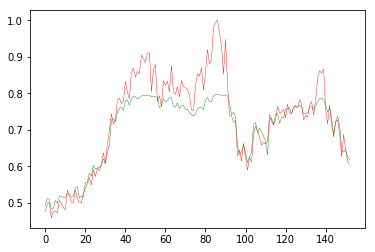

In [65]:
#This is the prediction. IT seems to work okay, although I'd mess around with the hyperparameters a bit more
#This was just to see I could implement a research paper on my own, and I was pleased with the results.
#The prediction closely follows, but doesn't match the heights of the peaks.
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('/home/parth/Pictures/work/300122/prediction.svg')
plt.show()

In [66]:
rescaled_real= scaler.inverse_transform(scaled_df1)

In [ ]:
#So that was a fun exercise! Actually not much fun, the paper was very vague in a lot of key aspects.
#Here's the link again: 
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180944#pone.0180944.ref004